In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

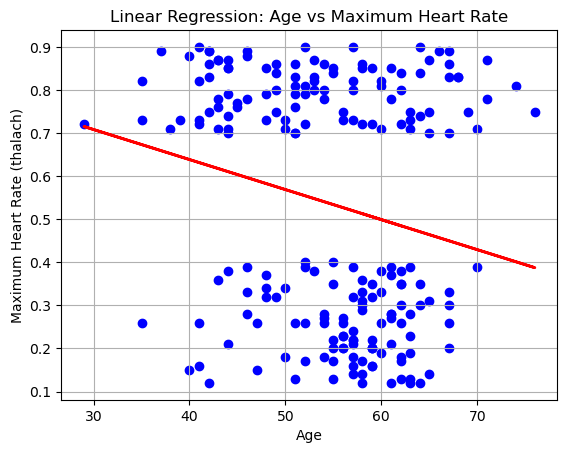

Confusion Matrix:
[[72 30]
 [43 60]]


In [127]:
data = pd.read_csv('heart.csv')
X = data[['age']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


threshold = np.mean(data['target'])  
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test_binary, (y_pred >= threshold).astype(int))

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Linear Regression: Age vs Maximum Heart Rate')
plt.grid(True)
plt.show()

print("Confusion Matrix:")
print(conf_matrix)

In [128]:
TN = 72
FP = 30
FN = 43
TP = 60

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall (Sensitivity):", round(recall,2))
print("F1-score:", round(f1_score,2))

Accuracy: 0.64
Precision: 0.67
Recall (Sensitivity): 0.58
F1-score: 0.62


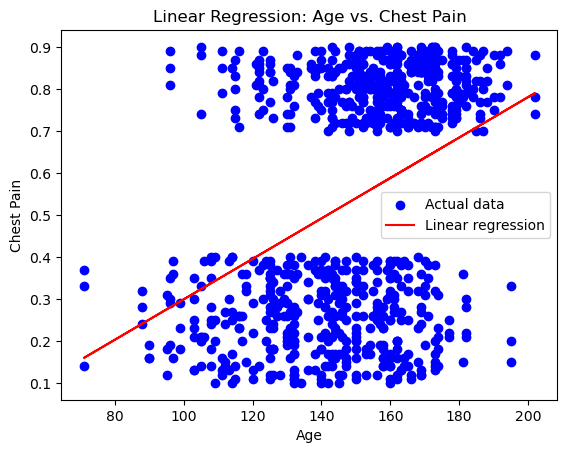